In [259]:
import warnings
warnings.filterwarnings('ignore')

In [260]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [261]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [262]:
DF['datetime'] = DF.datetime.apply(pd.to_datetime)

DF['year'] = DF.datetime.apply(lambda x:x.year)
DF['month'] = DF.datetime.apply(lambda x:x.month)
DF['day'] = DF.datetime.apply(lambda x:x.day)
DF['hour'] = DF.datetime.apply(lambda x:x.hour)

In [263]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [264]:
drop_columns = ['datetime', 'casual', 'registered']

DF.drop(drop_columns, axis=1, inplace=True)

In [265]:
DF.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


## 탐색적 데이터 분석 및 시각화

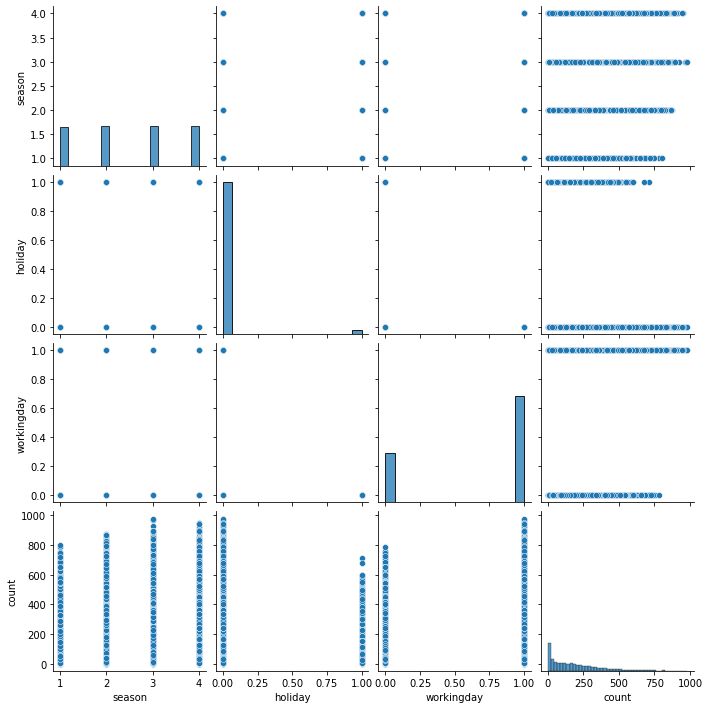

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(DF[['season', 'holiday', 'workingday', 'count']])
plt.show()

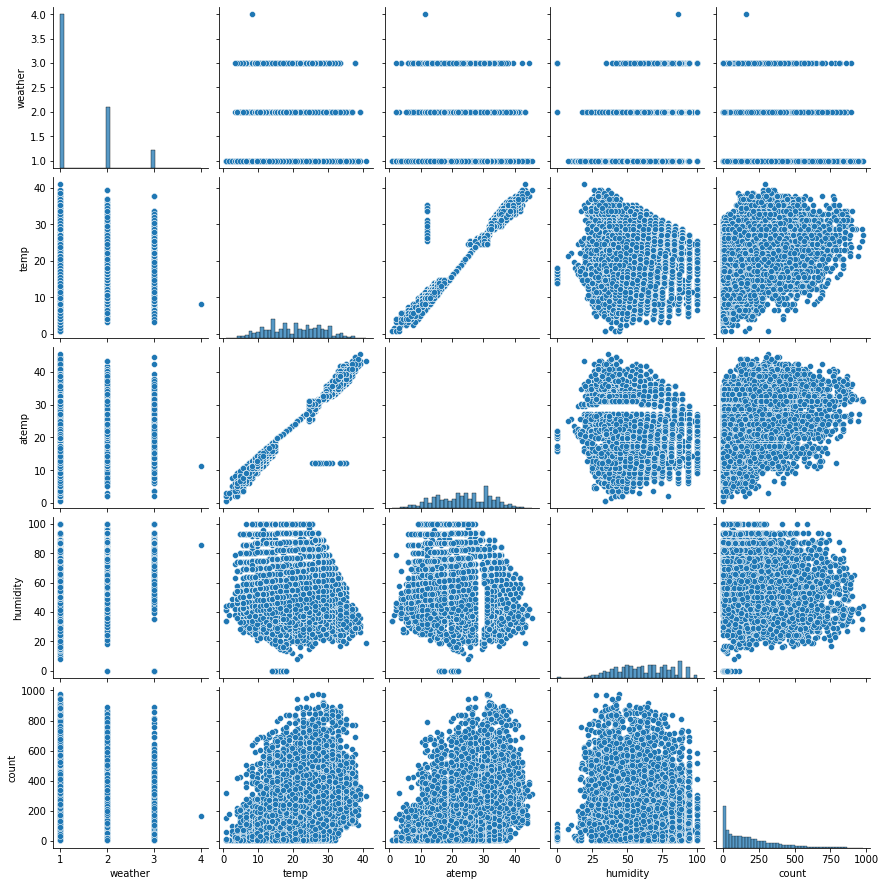

In [267]:
sns.pairplot(DF[['weather', 'temp', 'atemp', 'humidity', 'count']])
plt.show()

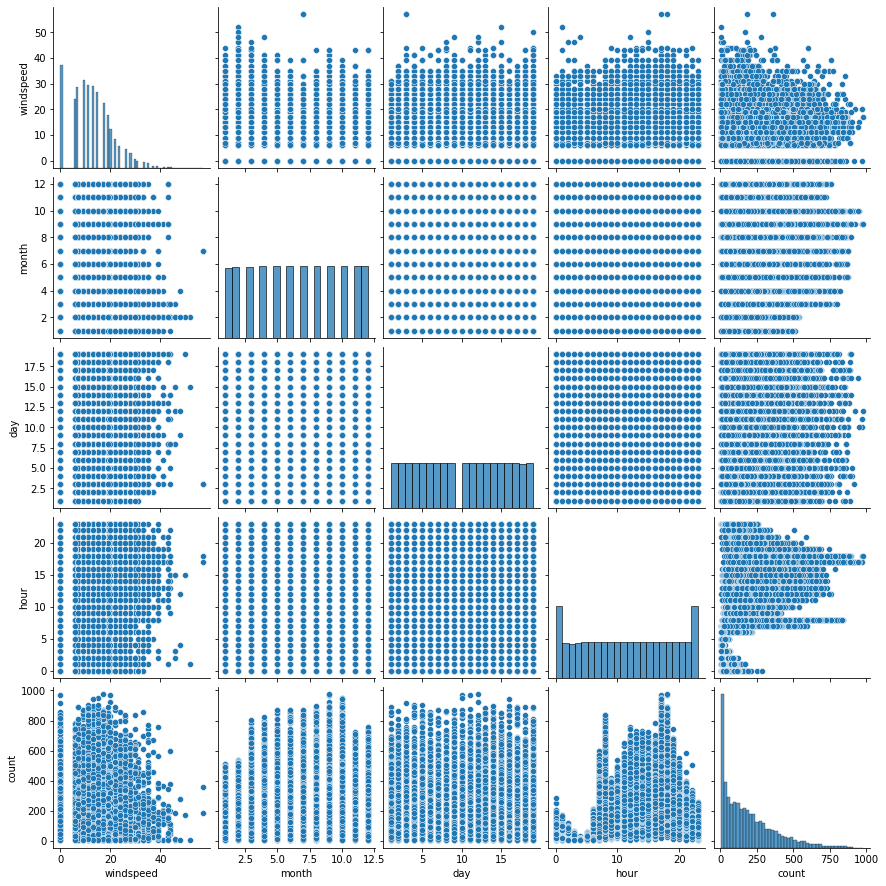

In [268]:
sns.pairplot(DF[['windspeed', 'month', 'day', 'hour', 'count']])
plt.show()

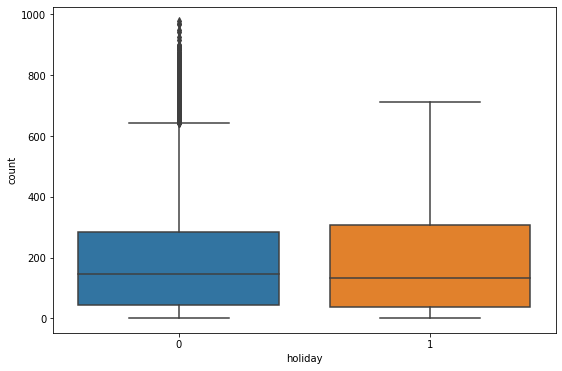

In [269]:
plt.figure(figsize=(9,6))
sns.boxplot(x='holiday', y='count', data=DF)
plt.show()

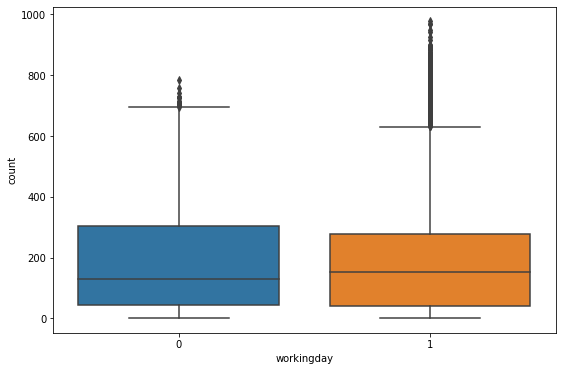

In [270]:
plt.figure(figsize=(9,6))
sns.boxplot(x='workingday', y='count', data=DF)
plt.show()

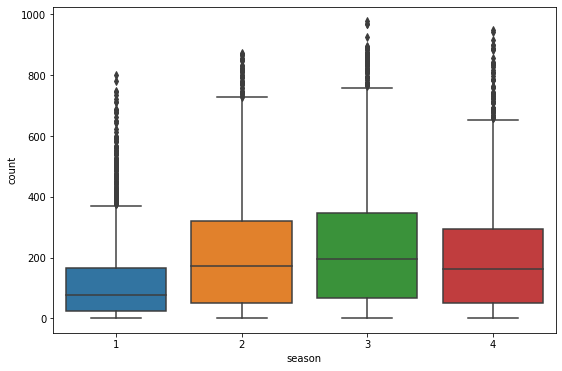

In [271]:
plt.figure(figsize=(9,6))
sns.boxplot(x='season', y='count', data=DF)
plt.show()

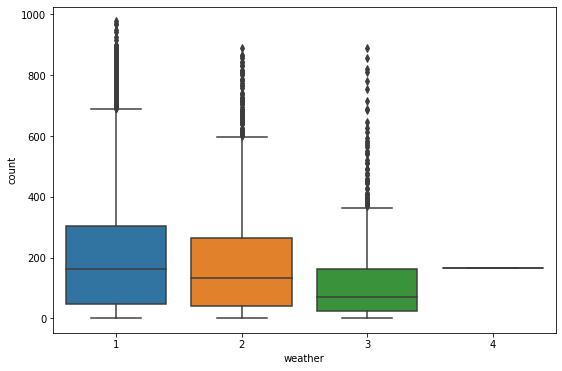

In [272]:
plt.figure(figsize=(9,6))
sns.boxplot(x='weather', y='count', data=DF)
plt.show()

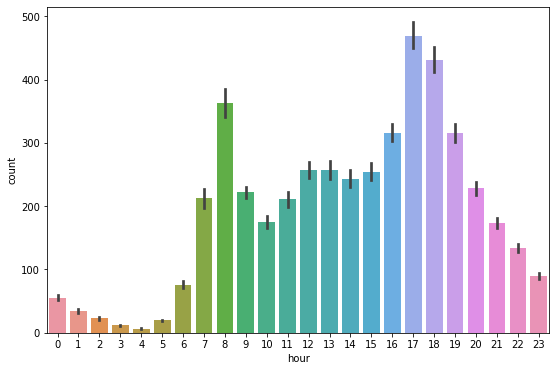

In [273]:
plt.figure(figsize=(9,6))
sns.barplot(data=DF, x='hour', y='count')
plt.show()

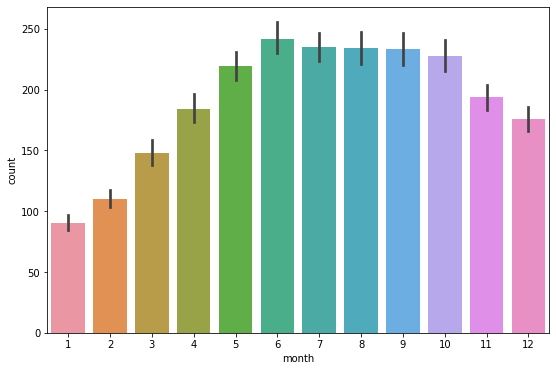

In [274]:
plt.figure(figsize=(9,6))
sns.barplot(data=DF, x='month', y='count')
plt.show()

In [275]:
import numpy as np

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

## 모든 features로 모델 생성

In [277]:
X = DF[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'year', 'month', 'day', 'hour']]
y = DF['count']

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=2045)

In [279]:
model_lr = LinearRegression(normalize=True,
                                n_jobs=-1)
model_lr.fit(X_train, y_train)

mse_lr1 = np.sqrt(mean_squared_error(y_test, model_lr.predict(X_test)))
print(mse_lr1)

142.2403004315698


In [280]:
model_en = ElasticNet(normalize=True,
                        alpha=0.001,
                        l1_ratio=0.5)
  
model_en.fit(X_train, y_train)

mse_en1 = np.sqrt(mean_squared_error(y_test, model_en.predict(X_test)))
print(mse_en1)

160.84089603385706


In [281]:
model_rfr = RandomForestRegressor(n_estimators=1000,
                                    max_features=12,
                                    max_depth=10,
                                    criterion='mse',
                                    n_jobs=-1,
                                    random_state=2045)
  
model_rfr.fit(X_train, y_train)

mse_rfr1 = np.sqrt(mean_squared_error(y_test, model_rfr.predict(X_test)))

print(mse_rfr1)

47.89870605249271


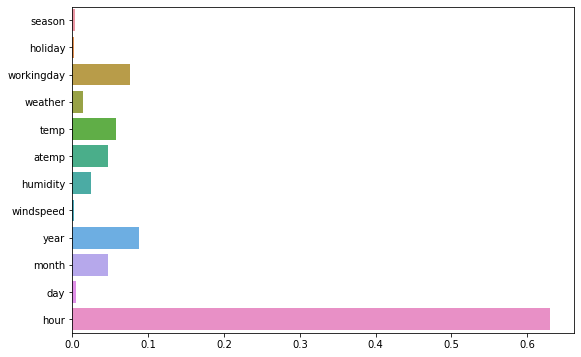

In [282]:
plt.figure(figsize=(9, 6))
sns.barplot(model_rfr.feature_importances_, ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                                             'humidity', 'windspeed', 'year', 'month', 'day', 'hour'])
plt.show()

In [283]:
model_xgb = XGBRegressor(booster='gblinear',
                           n_estimators=100,
                           learning_rate=0.4,
                           reg_lambda=2.0,
                           n_jobs=-1)
  
model_xgb.fit(X_train, y_train)

mse_xgb1 = np.sqrt(mean_squared_error(y_test, model_xgb.predict(X_test)))
print(mse_xgb1)

[07:36:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
148.01369042526085


In [284]:
model_rg = Ridge(normalize=True, alpha=0.5, solver='cholesky')

model_rg.fit(X_train, y_train)
mse_rg1 = np.sqrt(mean_squared_error(y_test, model_rg.predict(X_test)))
print(mse_rg1)

144.26089203730658


In [285]:
model_ls = Lasso(normalize=True, alpha=0.1)

model_ls.fit(X_train, y_train)
mse_ls1 = np.sqrt(mean_squared_error(y_test, model_ls.predict(X_test)))
print(mse_ls1)

142.92555453252243


In [286]:
print(f'Linear Regression : {mse_lr1:.3f}')
print(f'ElasticNet : {mse_en1:.3f}')
print(f'Random Forest Regressor: {mse_rfr1:.3f}')
print(f'eXtra Gradient Boost : {mse_xgb1:.3f}')
print(f'Ridge Regression : {mse_rg1:.3f}')
print(f'Lasso Regression : {mse_ls1:.3f}')

Linear Regression : 142.240
ElasticNet : 160.841
Random Forest Regressor: 47.899
eXtra Gradient Boost : 148.014
Ridge Regression : 144.261
Lasso Regression : 142.926


year, day 제외

In [287]:
X = DF[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'month', 'hour']]
y = DF['count']

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=2045)

In [289]:
model_lr = LinearRegression(normalize=True,
                                n_jobs=-1)
model_lr.fit(X_train, y_train)

mse_lr2 = np.sqrt(mean_squared_error(y_test, model_lr.predict(X_test)))
print(mse_lr2)

148.06674273226793


In [290]:
model_en = ElasticNet(normalize=True,
                        alpha=0.001,
                        l1_ratio=0.5)
  
model_en.fit(X_train, y_train)

mse_en2 = np.sqrt(mean_squared_error(y_test, model_en.predict(X_test)))
print(mse_en2)

163.04867759164955


In [291]:
model_rfr = RandomForestRegressor(n_estimators=1000,
                                    max_features=10,
                                    max_depth=10,
                                    criterion='mse',
                                    n_jobs=-1,
                                    random_state=2045)
  
model_rfr.fit(X_train, y_train)

mse_rfr2 = np.sqrt(mean_squared_error(y_test, model_rfr.predict(X_test)))

print(mse_rfr2)

71.20850454252567


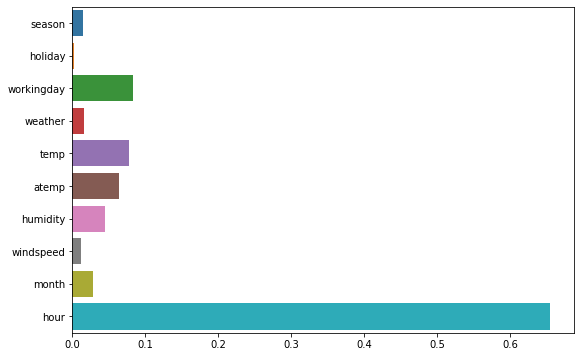

In [292]:
plt.figure(figsize=(9, 6))
sns.barplot(model_rfr.feature_importances_, ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                                             'humidity', 'windspeed', 'month', 'hour'])
plt.show()

In [293]:
model_xgb = XGBRegressor(booster='gblinear',
                           n_estimators=100,
                           learning_rate=0.4,
                           reg_lambda=2.0,
                           n_jobs=-1)
  
model_xgb.fit(X_train, y_train)

mse_xgb2 = np.sqrt(mean_squared_error(y_test, model_xgb.predict(X_test)))
print(mse_xgb2)

[07:36:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
147.8888205581101


In [294]:
model_rg = Ridge(normalize=True, alpha=0.5, solver='cholesky')

model_rg.fit(X_train, y_train)
mse_rg2 = np.sqrt(mean_squared_error(y_test, model_rg.predict(X_test)))
print(mse_rg2)

149.41845195873998


In [295]:
model_ls = Lasso(normalize=True, alpha=0.1)

model_ls.fit(X_train, y_train)
mse_ls2 = np.sqrt(mean_squared_error(y_test, model_ls.predict(X_test)))
print(mse_ls2)

148.5815521966561


In [296]:
print(f'Linear Regression : {mse_lr2:.3f}')
print(f'ElasticNet : {mse_en2:.3f}')
print(f'Random Forest Regressor: {mse_rfr2:.3f}')
print(f'eXtra Gradient Boost : {mse_xgb2:.3f}')
print(f'Ridge Regression : {mse_rg2:.3f}')
print(f'Lasso Regression : {mse_ls2:.3f}')

Linear Regression : 148.067
ElasticNet : 163.049
Random Forest Regressor: 71.209
eXtra Gradient Boost : 147.889
Ridge Regression : 149.418
Lasso Regression : 148.582


workingday, temp, atemp, hour

In [297]:
X = DF[['workingday', 'temp', 'atemp', 'hour']]
y = DF['count']

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=2045)

In [299]:
model_lr = LinearRegression(normalize=True,
                                n_jobs=-1)
model_lr.fit(X_train, y_train)

mse_lr3 = np.sqrt(mean_squared_error(y_test, model_lr.predict(X_test)))
print(mse_lr3)

154.282182124531


In [300]:
model_en = ElasticNet(normalize=True,
                        alpha=0.001,
                        l1_ratio=0.5)
  
model_en.fit(X_train, y_train)

mse_en3 = np.sqrt(mean_squared_error(y_test, model_en.predict(X_test)))
print(mse_en3)

167.4032328782509


In [301]:
model_rfr = RandomForestRegressor(n_estimators=1000,
                                    max_features=4,
                                    max_depth=10,
                                    criterion='mse',
                                    n_jobs=-1,
                                    random_state=2045)
  
model_rfr.fit(X_train, y_train)

mse_rfr3 = np.sqrt(mean_squared_error(y_test, model_rfr.predict(X_test)))

print(mse_rfr3)

82.97901930393684


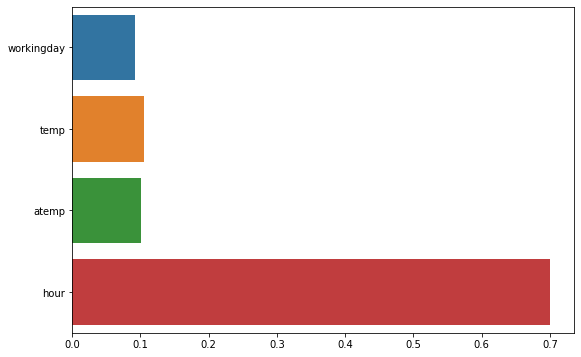

In [302]:
plt.figure(figsize=(9, 6))
sns.barplot(model_rfr.feature_importances_, ['workingday', 'temp', 'atemp', 'hour'])
plt.show()

In [303]:
model_xgb = XGBRegressor(booster='gblinear',
                           n_estimators=100,
                           learning_rate=0.4,
                           reg_lambda=2.0,
                           n_jobs=-1)
  
model_xgb.fit(X_train, y_train)

mse_xgb3 = np.sqrt(mean_squared_error(y_test, model_xgb.predict(X_test)))
print(mse_xgb3)

[07:36:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
154.32255751568965


In [304]:
print(f'Linear Regression : {mse_lr3:.3f}')
print(f'ElasticNet : {mse_en3:.3f}')
print(f'Random Forest Regressor: {mse_rfr3:.3f}')
print(f'eXtra Gradient Boost : {mse_xgb3:.3f}')


Linear Regression : 154.282
ElasticNet : 167.403
Random Forest Regressor: 82.979
eXtra Gradient Boost : 154.323


random forest 변경

In [305]:
X = DF[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'year', 'month', 'day', 'hour']]
y = DF['count']

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=2045)

In [307]:
model_rfr = RandomForestRegressor(n_estimators=2000,
                                    max_features=7,
                                    max_depth=20,
                                    criterion='mse',
                                    n_jobs=-1,
                                    random_state=2045)
  
model_rfr.fit(X_train, y_train)

mse_rfr4 = np.sqrt(mean_squared_error(y_test, model_rfr.predict(X_test)))

print(mse_rfr4)

45.05685495772685


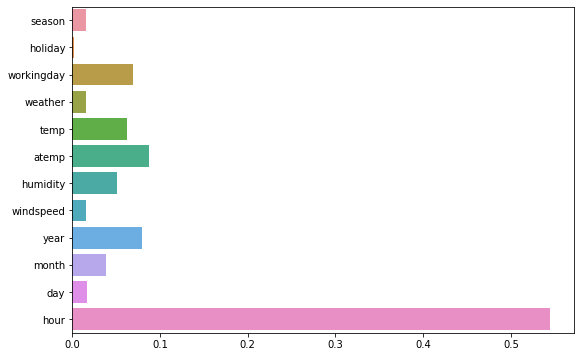

In [308]:
plt.figure(figsize=(9, 6))
sns.barplot(model_rfr.feature_importances_, ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                                             'humidity', 'windspeed', 'year', 'month', 'day', 'hour'])
plt.show()

In [317]:
X = DF[['season', 'workingday', 'weather', 'atemp', 'humidity', 'month', 'hour']]
y = DF['count']

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=2045)

In [319]:
model_lr = LinearRegression(normalize=True,
                                n_jobs=-1)
model_lr.fit(X_train, y_train)

mse_lr5 = np.sqrt(mean_squared_error(y_test, model_lr.predict(X_test)))
print(mse_lr5)

148.11775703415628


In [320]:
model_en = ElasticNet(normalize=True,
                        alpha=0.001,
                        l1_ratio=0.5)
  
model_en.fit(X_train, y_train)

mse_en5 = np.sqrt(mean_squared_error(y_test, model_en.predict(X_test)))
print(mse_en5)

165.62006461169727


In [321]:
model_rfr = RandomForestRegressor(n_estimators=1000,
                                    max_features=7,
                                    max_depth=10,
                                    criterion='mse',
                                    n_jobs=-1,
                                    random_state=2045)
  
model_rfr.fit(X_train, y_train)

mse_rfr5 = np.sqrt(mean_squared_error(y_test, model_rfr.predict(X_test)))

print(mse_rfr5)

72.03421967300274


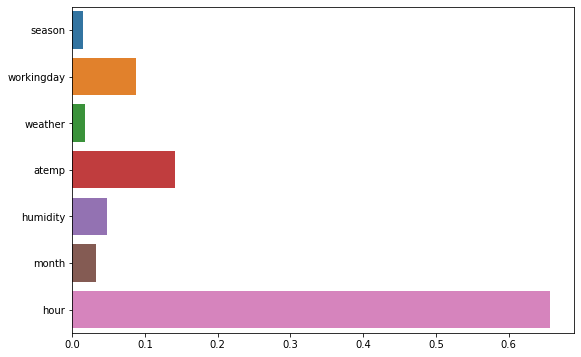

In [322]:
plt.figure(figsize=(9, 6))
sns.barplot(model_rfr.feature_importances_, ['season', 'workingday', 'weather', 'atemp', 'humidity', 'month', 'hour'])
plt.show()

In [323]:
model_xgb = XGBRegressor(booster='gblinear',
                           n_estimators=100,
                           learning_rate=0.4,
                           reg_lambda=2.0,
                           n_jobs=-1)
  
model_xgb.fit(X_train, y_train)

mse_xgb5 = np.sqrt(mean_squared_error(y_test, model_xgb.predict(X_test)))
print(mse_xgb5)

[07:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
148.11987430119802


In [324]:
print(f'Linear Regression : {mse_lr5:.3f}')
print(f'ElasticNet : {mse_en5:.3f}')
print(f'Random Forest Regressor: {mse_rfr5:.3f}')
print(f'eXtra Gradient Boost : {mse_xgb5:.3f}')


Linear Regression : 148.118
ElasticNet : 165.620
Random Forest Regressor: 72.034
eXtra Gradient Boost : 148.120
